In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
from tqdm import tqdm


In [2]:
HEADER = ['F3', 'Fz', 'F4', 'FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'P3', 'Pz', 'P4', 'Oz', 'Photoresistor']
tsv = pd.read_csv("../data/S1_21_tomas_3.csv", sep="\t", names=HEADER)
tsv

,F3,Fz,F4,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,P3,Pz,P4,Oz,Photoresistor
0,-18856.266899,-18698.463583,-13608.658446,-11045.896834,-17954.552824,-18615.091576,-18381.202922,-18494.392156,-16687.924169,-16375.647947,-15073.278853,-10303.796566,-16564.408429,-8581.393490,-16312.772490,-8063.280054,116.5
1,-36212.552930,-35802.107847,-25643.374103,-20525.808099,-34324.456373,-35642.091708,-35190.765284,-35385.068999,-35802.867806,-35301.451123,-32613.877370,-21845.298629,-35402.123380,-18363.142712,-35332.497696,-19792.045032,117.0
2,-36659.856040,-36327.865580,-26154.022056,-20989.673852,-34807.857550,-36134.701804,-35648.216086,-35872.091159,-34427.632025,-33938.508801,-31252.410263,-20684.192560,-34035.135393,-17620.126023,-33943.180316,-18412.785937,114.5
3,-37182.015143,-36869.358941,-26695.023679,-21550.233251,-35390.902804,-36708.873416,-36238.972692,-36463.071282,-36127.884522,-35594.616603,-32858.584268,-21823.237458,-35647.701996,-18155.673820,-35635.185019,-20044.619744,116.5
4,-35810.601510,-35476.174709,-25330.628494,-20160.915871,-33987.973212,-35300.333536,-34835.841934,-35048.585838,-34755.621523,-34259.189279,-31617.481305,-21101.521981,-34375.731275,-17978.379783,-34278.188262,-18788.250540,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755352,-4394.442367,-17609.799517,-2994.306742,-264.465840,-15671.478590,-22719.564762,-19031.728093,-18740.484862,-20195.002281,-21788.547550,-8458.481247,-1488.335608,-13781.549189,-1360.170705,-20738.082616,1832.775990,107.5
755353,-5551.949805,-19012.215020,-4375.041053,-1651.212770,-17055.520958,-24102.243674,-20414.116432,-20121.062710,-19467.363592,-21052.057570,-7717.744436,-711.076046,-13037.124340,-421.062162,-19993.613064,2584.375749,106.5
755354,-5321.905651,-18562.162645,-3945.686393,-1224.875596,-16626.792148,-23676.912329,-19995.110630,-19700.134659,-21093.967091,-22686.506532,-9332.859139,-2311.930336,-14659.056325,-1922.361782,-21621.267095,964.164849,107.5
755355,-4508.525671,-17846.750360,-3219.277050,-493.437111,-15899.622846,-22941.450529,-19259.291203,-18965.343412,-19228.512851,-20823.354521,-7497.244477,-532.351498,-12817.451396,-440.686994,-19773.046049,2801.724112,105.5


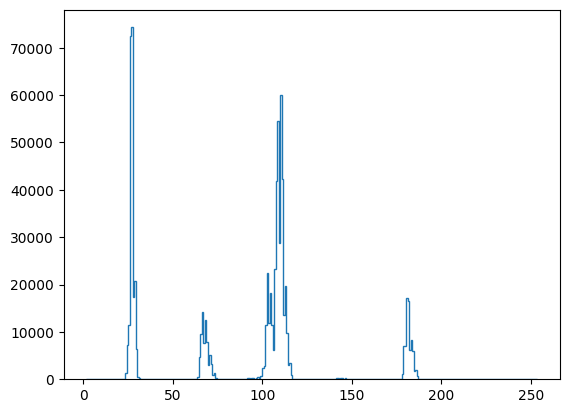

In [3]:
pr = tsv["Photoresistor"].to_numpy()
tsv["Photoresistor"].to_csv("../data/photoresistor.csv")

bins, count = np.histogram(pr, bins=300)

plt.figure()
plt.stairs(bins, count)
plt.show()

In [4]:
# Through graphical analysis
ACTION_1_MIN = 48
ACTION_1_MAX = 82
ACTION_2_MIN = 164
ACTION_2_MAX = 210

"""
Reading the csv generated by the protocol program, we know that:
- The first action was the right hand
- The right hand option is paired with up (both hands)
- The first reponse was HIGH (so ACTION_2)
- Each action was recorded (15 samples per set) * 5 (set count) * 2 (action + imagined) = 150

Also, through value analysis, values before 5300 and after 687900 shouldn't be used, since they are after the experiment end.

Useful numbers to know:

- Expected n of high samples = low samples = 150 * 2 = 300
- Expected n of rests = n high samples + n low samples = 600
- Expected n of pauses = n sets + 1 = 7
"""

data = tsv.to_numpy()[5300:751200, :].T
data = data[:-1]

In [5]:
print("Axis 0", np.shape(np.sum(data, axis = 0)))
print("Axis 1", np.shape(np.sum(data, axis = 1)))

Axis 0 (682600,)
Axis 1 (16,)


<h1>Pre-processing</h1>

In [76]:
fs = 125
nyq = fs/2
fl = 2
fh = 45
winlen = 501

filt = scp.signal.firwin(501, [fl, fh], pass_zero = False, fs = fs)


w, h = scp.signal.freqz(filt)

# Usámos um filtro FIR, com group delay consistente e conhecido. Ao usar filtfilt, o filtro é aplicado forward e backward. 
# Assim, o group delay é eliminado e a ordem do filtro é duplicada
filtered = scp.signal.filtfilt(filt, [1], data, axis = 1)



Text(0.5, 0, 'Freq (Hz)')

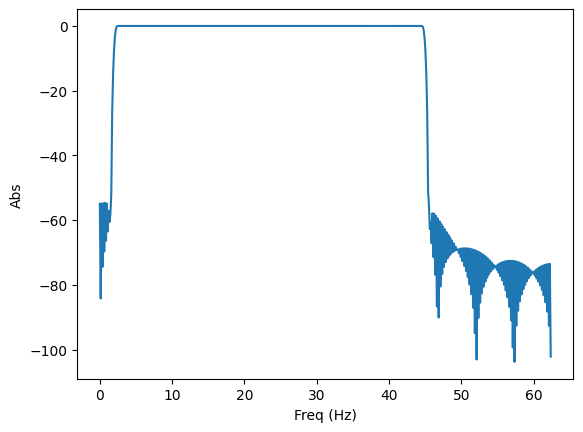

In [77]:
plt.close('all')
plt.figure()
plt.plot(nyq * w/(np.pi), 20 * np.log10(abs(h)))
plt.ylabel("Abs")
plt.xlabel("Freq (Hz)")



In [78]:
from fft import fft

X1 = fft(filtered, axis = 1)
# X2 = np.fft.fft(filtered[0:1],axis = 1)
print(X1.shape)

print(X1[0].shape)

(16, 1048576)
(1048576,)


In [88]:
X2 = np.fft.fft(filtered,axis = 1)
print(X2.shape)

(16, 682600)


<h2>Plotting frequency domain and noise frequency identification</h2>

Noise frequency is:  25.16782283782959


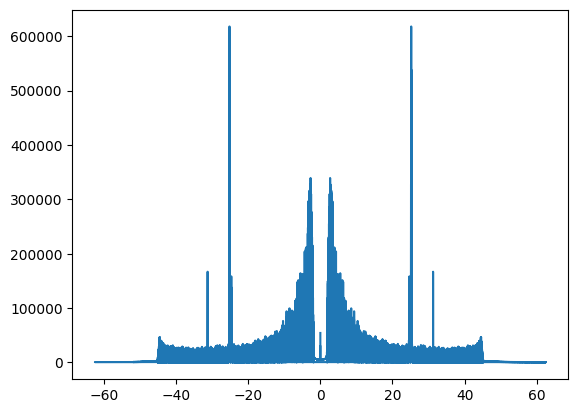

In [90]:
x = np.fft.fftfreq(len(X1[0]), 1/fs)
plt.figure()
plt.plot(x, abs(X1[0]))

fnoise = x[np.argmax(X1[0])]
print("Noise frequency is: ", fnoise)

# xx = x[np.where(x >20)[0][0]:round(len(X1[0])/2)]
# fnoise = xx[np.argmax(X1[0][np.where(x >20)[0][0]:round(len(X1[0])/2)])]
# print("Noise frequency is: ", fnoise)


<h1>Criação de um banco de filtros para utilização com CSP (FBCSP) </h1>

In [95]:
bands = []
f1 = 4
f2 = 8
maxf = 40

while f2 <= maxf:
    bands.append([f1, f2])
    f1 += 2
    f2 += 2
print(bands)

bandfiltered = []
for i in tqdm(range(len(bands))):
    if i == 9 or i == 10:
       print("removing freq noise")
       filt = scp.signal.firwin(501, [bands[i][0], fnoise - 0.5, fnoise + 0.5, bands[i][1]], pass_zero = False, fs = fs)
    else:
        filt = scp.signal.firwin(501, [bands[i][0], bands[i][1]], pass_zero = False, fs = fs)
    bandfiltered.append(scp.signal.filtfilt(filt, [1], filtered, axis = 1))





[[4, 8], [6, 10], [8, 12], [10, 14], [12, 16], [14, 18], [16, 20], [18, 22], [20, 24], [22, 26], [24, 28], [26, 30], [28, 32], [30, 34], [32, 36], [34, 38], [36, 40]]


 53%|█████▎    | 9/17 [05:31<04:48, 36.06s/it]

removing freq noise


 59%|█████▉    | 10/17 [06:16<04:31, 38.76s/it]

removing freq noise


100%|██████████| 17/17 [10:40<00:00, 37.69s/it]


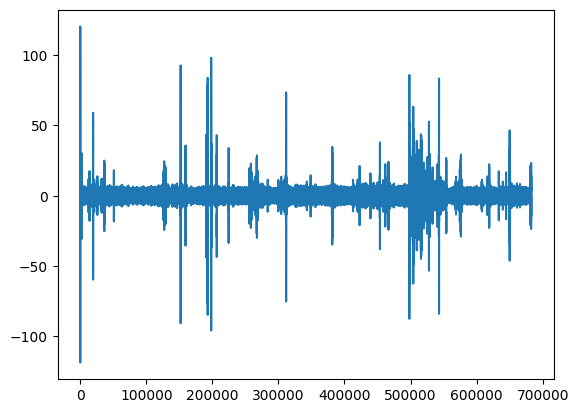

In [82]:
plt.figure()
plt.plot(bandfiltered[8][0])

c:\Users\tomas\Desktop\Trabalho\FEUP\Neuro\Project\eegaming\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tomas\Desktop\Trabalho\FEUP\Neuro\Project\eegaming\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


27.546879578083797


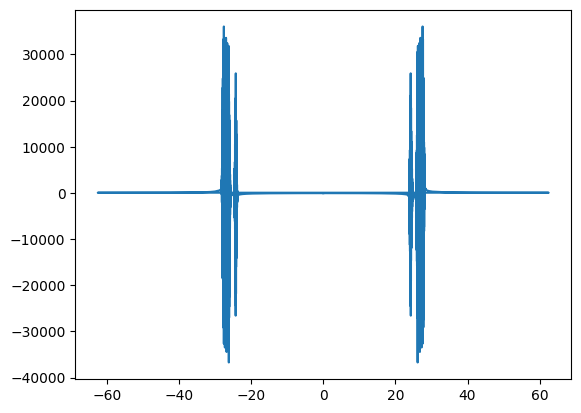

In [96]:
y = scp.fft.fft(bandfiltered[10][0])
x = scp.fft.fftfreq(len(y), 1/fs)
plt.plot(x, y)

<h1> Real-time <b>(adaptar)</h1>